### Fraudulent job posting prediction project
+ EDA
+ Initial data cleaning

In [2]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
import re
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [3]:
# Import data
data = pd.read_csv('../data/fake_job_postings.csv', index_col= 'job_id')
data.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
job_id,,,,,,,,,,,,,,,,,
1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


### Initial data exploration

In [3]:
df = data.copy()

In [4]:
df.shape

(17880, 18)

In [5]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [7]:
# Explore duplicates
df.duplicated().sum()
# df = df.drop_duplicates()

0

In [8]:
# Explore NAs
df.isna().sum().sort_values(ascending=False)/len(df.index)*100

salary_range           83.959732
department             64.580537
required_education     45.329978
benefits               40.335570
required_experience    39.429530
function               36.101790
industry               27.421700
employment_type        19.412752
company_profile        18.501119
requirements           15.078300
location                1.935123
description             0.005593
job_id                  0.000000
telecommuting           0.000000
has_questions           0.000000
has_company_logo        0.000000
title                   0.000000
fraudulent              0.000000
dtype: float64

<Axes: >

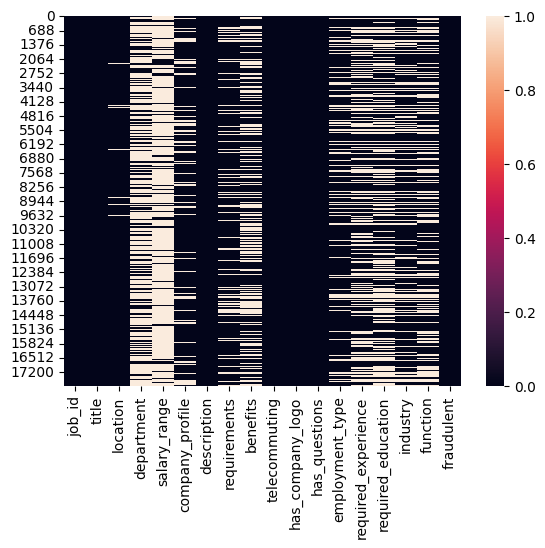

In [9]:
# Explore NAs
sns.heatmap(df.isna() , cbar = True)

In [10]:
# Fradulent x Real postings distribution
df['fraudulent'].value_counts().sort_values(ascending=False)/len(df.index)*100

fraudulent
0    95.1566
1     4.8434
Name: count, dtype: float64

<Axes: xlabel='fraudulent', ylabel='count'>

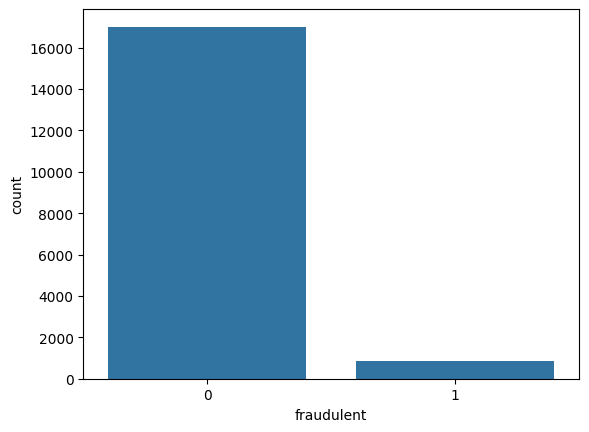

In [11]:
sns.countplot(x = 'fraudulent', data = df)

In [12]:
# Industry exploration
df['industry'].value_counts()

industry
Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
Education Management                    822
                                       ... 
Shipbuilding                              1
Sporting Goods                            1
Museums and Institutions                  1
Wine and Spirits                          1
Ranching                                  1
Name: count, Length: 131, dtype: int64

In [13]:
# Employment type exploration
df['employment_type'].value_counts()

employment_type
Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: count, dtype: int64

In [14]:
# Job posting length analysis: 'text' column (company profile, description, benefits, requirements)
text_cols = ['company_profile', 'description', 'benefits', 'requirements']

df['text'] = df[text_cols].apply(lambda x: ' '.join(x.dropna().astype(str)), axis = 1)

In [15]:
def text_legth(text):
    return len(text)

df['length_text'] = df['text'].apply(text_legth)

In [47]:
df = df.drop('text', axis = 1)

<Axes: xlabel='fraudulent', ylabel='length_text'>

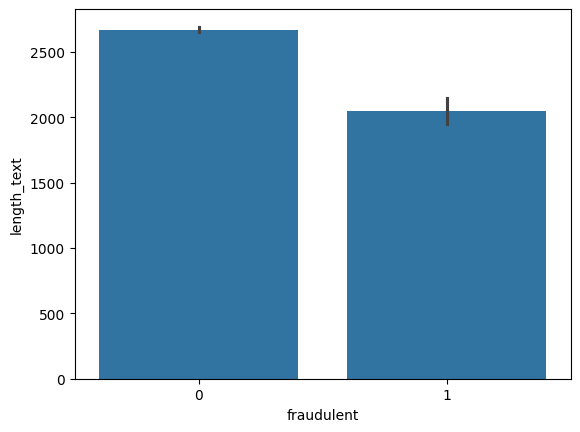

In [16]:
# Length of text: fraudulent x real
sns.barplot(x = 'fraudulent' , y = 'length_text', data = df)

<Axes: >

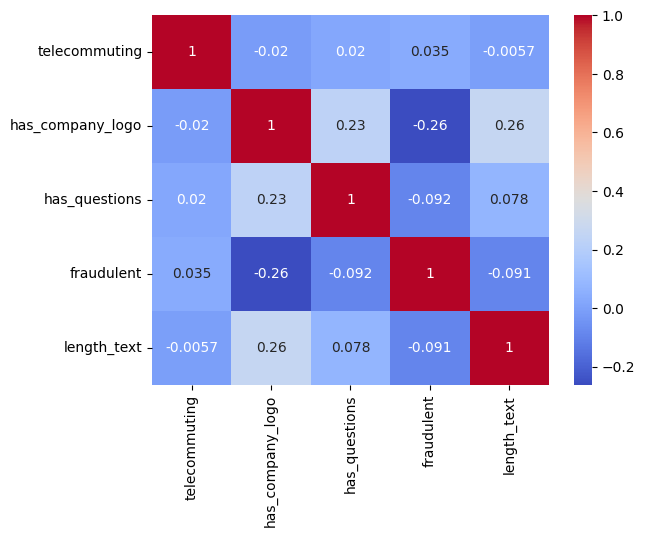

In [17]:
# Variables correlation heatmap
hm_cols = ['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent', 'length_text']
corr = df[hm_cols].corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

### Initial data cleaning

In [18]:
# separate salary_range into min and max salary columns
df[['min_salary', 'max_salary']] = df['salary_range'].str.split('-', n = 1, expand=True)

In [19]:
# separate location column into country, state and city columns
df[['country', 'state', 'city']] = df['location'].str.split(', ', n = 2, expand=True)

In [20]:
# drop cols salary_range and location
df = df.drop(['salary_range', 'location', 'text'], axis = 1)

In [21]:
# which columns are categorical?
cat_cols = []

for col in df.columns:
    print(f"Unique values in {col}:", df[col].nunique())
    if df[col].nunique() < 15:
        cat_cols.append(col)
print(f'Categorical columns:', cat_cols)

Unique values in job_id: 17880
Unique values in title: 11231
Unique values in department: 1337
Unique values in company_profile: 1709
Unique values in description: 14801
Unique values in requirements: 11967
Unique values in benefits: 6204
Unique values in telecommuting: 2
Unique values in has_company_logo: 2
Unique values in has_questions: 2
Unique values in employment_type: 5
Unique values in required_experience: 7
Unique values in required_education: 13
Unique values in industry: 131
Unique values in function: 37
Unique values in fraudulent: 2
Unique values in length_text: 5204
Unique values in min_salary: 244
Unique values in max_salary: 278
Unique values in country: 90
Unique values in state: 325
Unique values in city: 2388
Categorical columns: ['telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'fraudulent']


In [22]:
# Replace NaN in text columns with ''
for col in list(set(df.columns) - set(cat_cols)):
    if df[col].dtypes == 'object':
        df[col] = df[col].fillna('')
print(df.isnull().sum())

job_id                    0
title                     0
department                0
company_profile           0
description               0
requirements              0
benefits                  0
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        3471
required_experience    7050
required_education     8105
industry                  0
function                  0
fraudulent                0
length_text               0
min_salary                0
max_salary                0
country                   0
state                     0
city                      0
dtype: int64


### Text preprocessing
+ Remove special characters
+ Remove stop words
+ Tokenize
+ Lemmatize

In [41]:
# text cleaning
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.strip()  # Remove whitespace
    return text

def clean_text_columns(df, column_names): 
    # Iterate over the list of column names and apply the clean_text function
    for column_name in column_names:
         df[column_name] = df[column_name].astype(str).apply(lambda x: clean_text(x))
    return df

In [43]:
text_cols_to_clean = ['title', 'department', 'company_profile', 'description', 
                      'requirements', 'benefits', 'industry', 'function']

In [44]:
df = clean_text_columns(df, text_cols_to_clean)

In [45]:
# removing stop words
def rm_stop_words(df, column_names):
    # Get list of stop words
    stop_words = set(stopwords.words('english'))
    
    # remove stop words from a string
    def rm_stop_words_text(text):
        return ' '.join([word for word in text.split() if word not in stop_words])
    
    # Iterate over the list of column names and apply the stop word removal
    for column_name in column_names:
        df[column_name] = df[column_name].astype(str).apply(rm_stop_words_text)
    
    return df

In [46]:
df = rm_stop_words(df, text_cols_to_clean)

In [31]:
# tokenize and lemmatize
def tokenize_and_lemmatize_text(text, lemmatizer):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

def tokenize_and_lemmatize_columns(df, column_names):
    lemmatizer = WordNetLemmatizer()
    
    # Iterate over the list of column names and apply tokenization and lemmatization
    for column_name in column_names:
        df[column_name] = df[column_name].astype(str).apply(lambda x: tokenize_and_lemmatize_text(x, lemmatizer))
    
    return df

In [48]:
df = tokenize_and_lemmatize_columns(df, text_cols_to_clean)

In [59]:
# Save cleaned df as .csv
df.to_csv('../data/job_postings_clean.csv', index = False)

### Word clouds

In [50]:
# Separating df of real and fraudulent ads
real_wc = df[df['fraudulent'] == 0]
fraud_wc = df[df['fraudulent'] == 1]

In [51]:
# create column with multiple text columns concatenated (to be displayed on word clouds)
columns_to_concat_wc = ['title', 'department', 'company_profile',
                     'description', 'requirements', 'benefits', 'employment_type',
                     'required_experience', 'required_education', 'industry', 'function']

real_wc['text_data_wc'] = real_wc[columns_to_concat_wc].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
fraud_wc['text_data_wc'] = fraud_wc[columns_to_concat_wc].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1) 

C:\Users\grazi\AppData\Local\Temp\ipykernel_24788\1415687322.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_wc['text_data_wc'] = real_wc[columns_to_concat_wc].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
C:\Users\grazi\AppData\Local\Temp\ipykernel_24788\1415687322.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_wc['text_data_wc'] = fraud_wc[columns_to_concat_wc].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)


In [53]:
# Preparing for word cloud
real_text = ' '.join(real_wc['text_data_wc'])
fraud_text = ' '.join(fraud_wc['text_data_wc'])

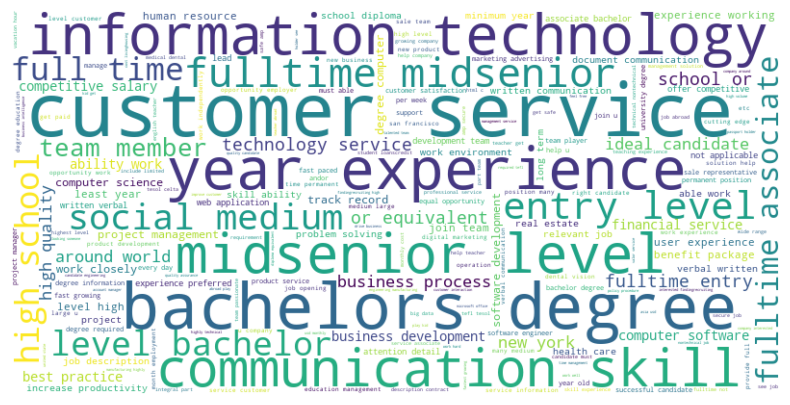

In [55]:
# Create a word cloud for real postings
unwanted_words= ['nan'] # to exclude unavailable from plotting
wordcloud_real = WordCloud(width=800, height=400, background_color='white', stopwords=unwanted_words).generate(real_text)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off') 
plt.show()

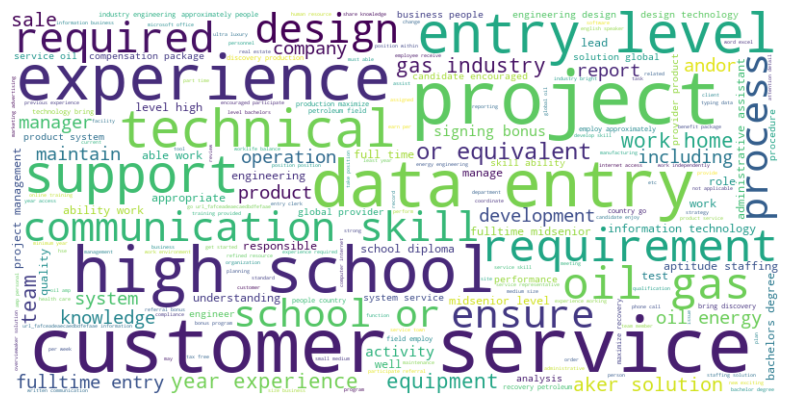

In [56]:
# Create a word cloud for fake postings
wordcloud_fraud = WordCloud(width=800, height=400, background_color='white', stopwords= unwanted_words).generate(fraud_text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fraud, interpolation='bilinear')
plt.axis('off') 
plt.show()